In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# for visualization -------------------

import matplotlib.pyplot as plt
import seaborn as srn

# for data pipeline --------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*

# for prediction (machine learning models) ------------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [ ]:
med_data=pd.read_csv('/kaggle/input/meditation-eegdata/thinking.csv')
thk_data=pd.read_csv('/kaggle/input/meditation-eegdata/meditating.csv')

In [ ]:
med_data.info()

In [ ]:
thk_data.info()

This picture has been given for better understanding of cranial structure to understand the EEG-charts.

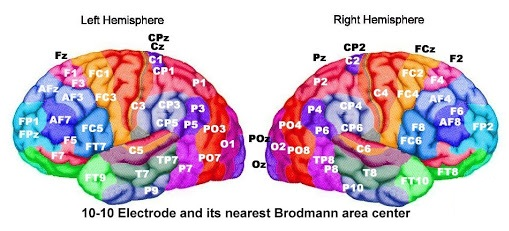

In this dataset we are having the data from the FP-2 to F4. You can see the data taken from where.

As the ***'Unnamed :1'*** has no values we are straightly dropping those.

In [ ]:
med_data.drop('Unnamed: 1',1,inplace=True)
thk_data.drop('Unnamed: 1',1,inplace=True)

In [ ]:
for i in range(15):
    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(i*10000,(i+1)*10000,1),med_data['FP2-F4'][i*10000:(i+1)*10000],s=0.5,label='meditation')
    plt.scatter(np.arange(i*10000,(i+1)*10000,1),thk_data['FP2-F4'][i*10000:(i+1)*10000],s=0.5,label='thinking')
    #diff=med_data['FP2-F4'][i*10000:(i+1)*10000]-thk_data['FP2-F4'][i*10000:(i+1)*10000]
    #plt.scatter(np.arange(i*10000,(i+1)*10000,1),(med_data['FP2-F4'][i*10000:(i+1)*10000]-thk_data['FP2-F4'][i*10000:(i+1)*10000]),s=0.5,label='difference')
    plt.title('Value Trace '+str(i+1))
    plt.legend()
    plt.show()

As the data is large we had to make charts in small chunks. and we found some brilliant analysis with those.

This chart has been produced in MS paint for understanding the curves deeper.

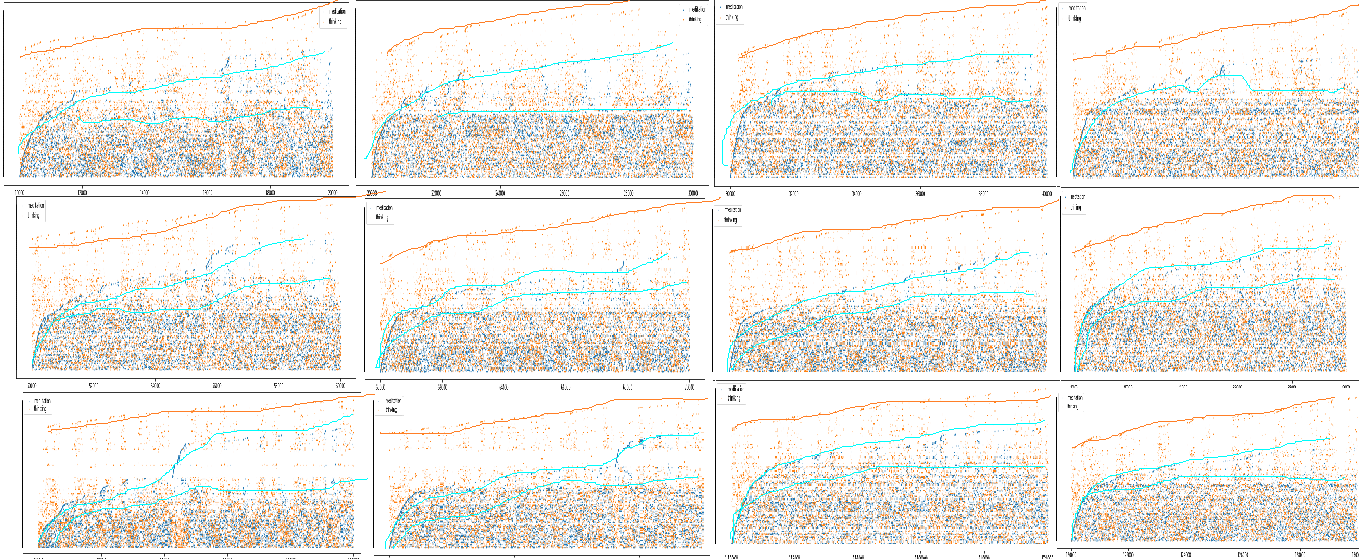

# Patterns :

### Overall:

1. We can see the that activity of brain when mediatating it pulsates in a slow manner while increasing in some point and stays constant with a low increasing rate on other cases.
2. On the other hand the activity of brain while thinking constantly grows with trom and some time the activity reaches maximum and then gets down for a gerater ttime, it pulstaes too but in a greater manner than while meditating.

The sheer peaks of the meditation activity curve shows diflection of thought humans have 

The blunt peaks of the thinking activity curve shows that thinking is an elongated work of brain. 
That also indicates latency of work of brain after heavy thinking.

# Further analysis:

As we have huge amount of data we can make further check.

We can merge different parts of data and find out if there is an anomaly.

#### Meditation Data:

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(0,10000,1),med_data['FP2-F4'][0:10000],s=0.5,label='head')
plt.scatter(np.arange(0,10000,1),med_data['FP2-F4'][140000:150000],s=0.5,label='tail',color='r')
plt.legend()
plt.show()

We can see that when starting to meditating the activity of brain reaches an optimum value and then start pulsating in a regular manner.
*The increaing curve* in **blue** is visible clearly.

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(0,10000,1),med_data['FP2-F4'][0:10000],s=0.5,label='head')
plt.scatter(np.arange(0,10000,1),med_data['FP2-F4'][140000:150000],s=0.5,label='tail',color='r')
plt.scatter(np.arange(0,10000,1),med_data['FP2-F4'][70000:80000],s=0.5,label='mid',color='g')
plt.legend()
plt.show()

Similarly we can see that pulsating peaks are allover resembles each other that means it pulsates in a very stable manner.
It can be a **individual** feature or **special character**.

In [ ]:
plt.figure(figsize=(20,5))
for i in range(15):
    plt.scatter(np.arange(i*10000,(i+1)*10000,1),med_data['FP2-F4'][i*10000:(i+1)*10000],s=0.5)
    #plt.scatter(np.arange(i*10000,(i+1)*10000,1),thk_data['FP2-F4'][i*10000:(i+1)*10000],s=0.5,label='thinking')

plt.show()

#### Conclusion:

1. The whole data graph shows that the **baseline activity** is reached after a quick time lapse.
2. Then the curve stays same for a great time and pulsates in it's constant wavelength .
3. Near 95000th observation there is another secondary rise which can show the highest level of mental stability achieved after meditating for some time.
4. These rise takes a while to reach it's maximal activity zone.

**Thinking Data**

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(0,10000,1),thk_data['FP2-F4'][0:10000],s=0.5,label='head')
plt.scatter(np.arange(0,10000,1),thk_data['FP2-F4'][140000:150000],s=0.5,label='tail',color='r')
plt.legend()
plt.show()

This scatterplot shows that activity of brain increaes when it is time for thinking. The maxima of the head of the data is much more lower than the maxima of the tail of the data.

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(np.arange(0,10000,1),thk_data['FP2-F4'][0:10000],s=0.5,label='head')
plt.scatter(np.arange(0,10000,1),thk_data['FP2-F4'][140000:150000],s=0.5,label='tail',color='r')
plt.scatter(np.arange(0,10000,1),thk_data['FP2-F4'][70000:80000],s=0.5,label='mid',color='g')
plt.legend()
plt.show()

This graph shows that the constant zone increases with time. But the peak is sheer in the mid-range than the final set which is more fat and blunt and lower than the mid range values. This shows that when thinking the brain pulsation are controlled with time for better accesion of memory in brain.

Sounds like digital analog system. But it is the true natural behaviour. :O

In [ ]:
plt.figure(figsize=(20,5))
for i in range(15):
    plt.scatter(np.arange(i*10000,(i+1)*10000,1),thk_data['FP2-F4'][i*10000:(i+1)*10000],s=0.5)
plt.show()

But in full visualization we can see that the pulsation actually increases and the sheer maximas are produced. Still the mid baseline activity is primarily achieved which shows that thinking broadens the activities from a working brain condition whereas meditation takes it to another level.

# THE END                               H8=/

This dataset does not help us produce different analysis ,but can help us find any anomaly in the data which we hadn't.

And shows  us it is brain activity of a very regular person.

# UPVOTE if yoy lik this kernel.  :)

You can visit my other works at [kaggle notebooks](https://www.kaggle.com/sagnik1511/notebooks)  or in [github repositories](https://github.com/sagnik1511?tab=repositories)  . If you like those too please upvote in kaggle and star in github.

#### THANK YOU